C:\Users\Aaron\AppData\Local\Temp\ipykernel_24864\1949433244.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm')


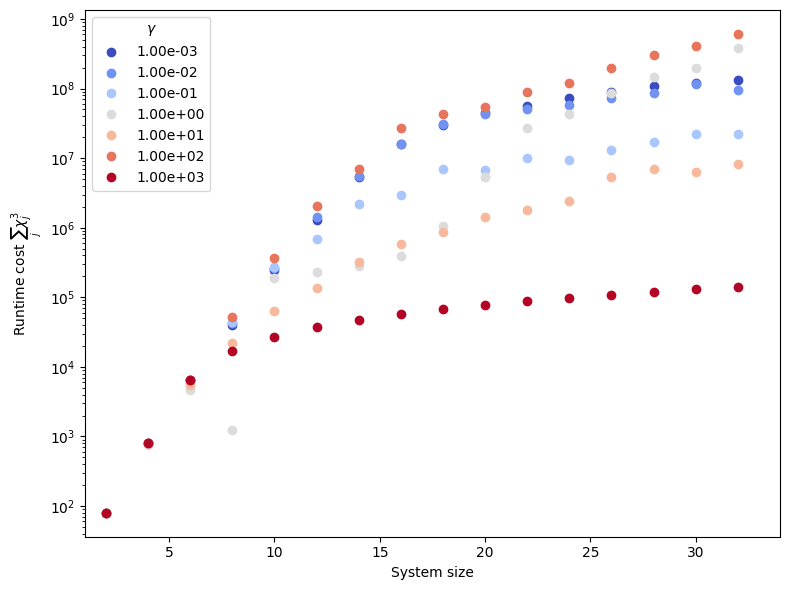

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pickle

gammas = [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
L_list = range(2, 34, 2)

# Use Reds colormap
cmap = cm.get_cmap('coolwarm')
norm = mcolors.Normalize(vmin=np.log10(min(gammas)), vmax=np.log10(max(gammas)))

plt.figure(figsize=(8, 6))

for j, gamma in enumerate(gammas):
    filename = f"results_{j}.pickle"
    with open(filename, 'rb') as f:
        results = pickle.load(f)
    results = np.array(results)

    color = cmap(norm(np.log10(gamma)))
    plt.plot(L_list, results, marker='o', linestyle='', label=f"{gamma:.2e}", color=color)

# Plot formatting
plt.yscale('log')
plt.xlim(1, 34)
plt.xlabel("System size")
plt.ylabel("Runtime cost $\\sum_j \\chi_j^3$")
plt.legend(title="$\\gamma$")
# plt.legend(title="Gamma", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()